## Introduction to K-means Clustering

The goal of K-means Clustering is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:

1. The centroids of the K clusters, which can be used to label new data
2. Labels for the training data (each data point is assigned to a single cluster)

Each centroid of a cluster is a collection of feature values which define the resulting groups. Examining the centroid feature weights can be used to qualitatively interpret what kind of group each cluster represents.

This is a versatile algorithm that can be used for any type of grouping. Some examples of use cases are:

- Behavioral segmentation:
    - Segment by purchase history
    - Segment by activities on application, website, or platform
    - Define personas based on interests
    - Create profiles based on activity monitoring
- Inventory categorization:
    - Group inventory by sales activity
    - Group inventory by manufacturing metrics
- Sorting sensor measurements:
    - Detect activity types in motion sensors
    - Group images
    - Separate audio
    - Identify groups in health monitoring
- Detecting bots or anomalies:
    - Separate valid activity groups from bots
    - Group valid activity to clean up outlier detection


## Algorithm

The Κ-means clustering algorithm uses iterative refinement to produce a final result. The algorithm inputs are the number of clusters Κ and the data set. The data set is a collection of features for each data point. The algorithms starts with initial estimates for the Κ centroids, which can either be randomly generated or randomly selected from the data set. The algorithm then iterates between two steps:

1. Each centroid defines one of the clusters. In this step, each data point is assigned to its nearest centroid, based on the squared Euclidean distance.
2. In this step, the centroids are recomputed. This is done by taking the mean of all data points assigned to that centroid's cluster.

The algorithm iterates between steps one and two until a stopping criteria is met (i.e., no data points change clusters, the sum of the distances is minimized, or some maximum number of iterations is reached).

This algorithm is guaranteed to converge to a result. The result may be a local optimum (i.e. not necessarily the best possible outcome), meaning that assessing more than one run of the algorithm with randomized starting centroids may give a better outcome.

## Choosing K

The algorithm described above finds the clusters and data set labels for a particular pre-chosen K. To find the number of clusters in the data, the user needs to run the K-means clustering algorithm for a range of K values and compare the results. In general, there is no method for determining exact value of K, but an accurate estimate can be obtained using the following techniques.

### Within Cluster Sum of Squares

One of the metrics that is commonly used to compare results across different values of K is _Within Cluster Sum of Squares_ (WCSS). WCSS measures the variability of the observations within each cluster. In general, a cluster that has a small sum of squares is more compact than a cluster that has a large sum of squares. Clusters that have higher values exhibit greater variability of the observations within the cluster.

$$\Large WCSS(k)=\sum_{j=1}^{k}\sum_{x_i\in{cluster_j}}(x_i-\bar{x}_j)^2$$
Where:
  * $k$ - number of clusters
  * $\bar{x}_j$ - mean of cluster $j$
  * $x_i$ - all samples that belong to cluster $j$

### Elbow method

A well-known method to validate the number of clusters is the Elbow method, that is to run K-means clustering several times for a range of values of K (usually from 2 to 10) and pick out the value of K that causes sudden drop in the sum of squared distances. More specifically, for each value of K, we calculate the sum of squared distances (between each point and the corresponding centroid) and graph the results on a line chart. Choose the value where the sum of squares drops, giving an angle in the graph (a.k.a an elbow) - that is the optimal value of K.

<img src="images/elbow-point-example.png" width=600></img>

"Elbow method" is often ambiguous and not very reliable, and hence other approaches for determining the number of clusters such as the silhouette method or gap statistic are preferable. 

More on Gap Statistic: https://datasciencelab.wordpress.com/2013/12/27/finding-the-k-in-k-means-clustering/


## Weakneses of K-means Clustering

K-means clustering is very simple and fast algorithm. It can efficiently deal with very large data sets. However there are some weaknesses, including:

1. It assumes prior knowledge of the data and requires the analyst to choose the appropriate number of cluster (K) in advance
2. The final results obtained is sensitive to the initial random selection of cluster centers. Why is it a problem? Because, for every different run of the algorithm on the same dataset, you may choose different set of initial centers. This may lead to different clustering results on different runs of the algorithm.
3. It’s sensitive to outliers.
4. If you rearrange your data, it’s very possible that you’ll get a different solution every time you change the ordering of your data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('../datasets/mall_customers.csv')

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [5]:
x = data[data.columns[3:5]]

In [6]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


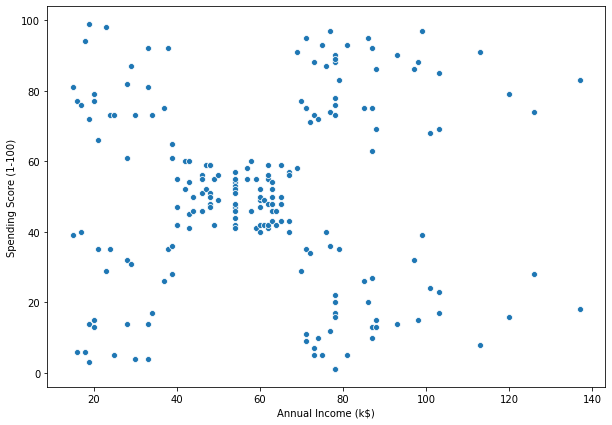

In [7]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x[x.columns[0]], x[x.columns[1]])

Visually we can see that there five clusters; four in each corner and one in the center. Let's calculate WCSS for each K and plot them.

In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

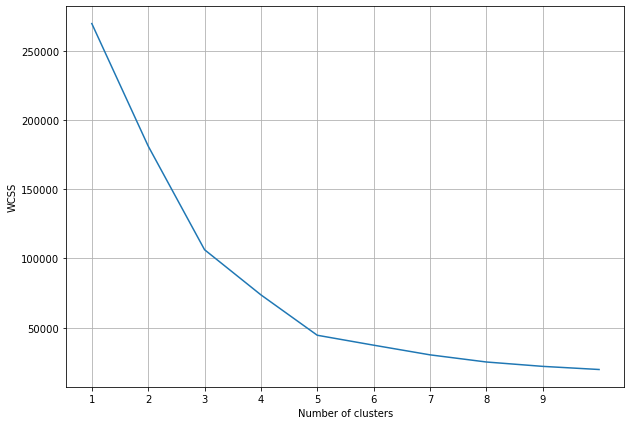

In [9]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.xticks(range(1, 10))
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [10]:
w = pd.Series(wcss, index=range(1, 11))

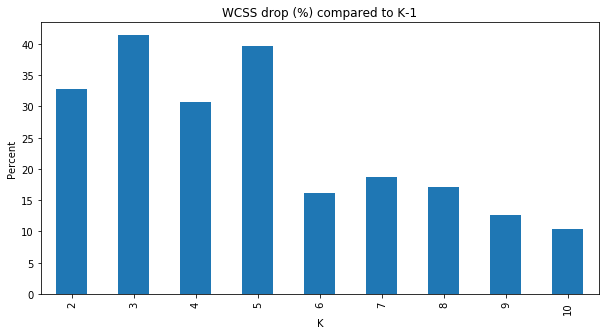

In [11]:
plt.figure(figsize=(10, 5))
(-(w / w.shift(1) - 1).dropna() * 100).plot(kind='bar')
plt.title('WCSS drop (%) compared to K-1')
plt.ylabel('Percent')
plt.xlabel('K')
plt.show()

In [12]:
# Let's visualize clusters when K=5
kmeans = KMeans(n_clusters=5)

In [13]:
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [14]:
data['cluster'] = y_kmeans

In [15]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


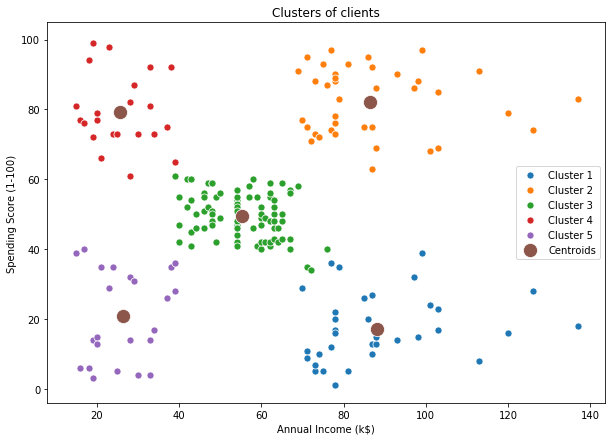

In [17]:
plt.figure(figsize=(10, 7))
for c in range(0, 5):
    sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=x.loc[data['cluster'] == c],
                    label='Cluster ' + str(c + 1), s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, label='Centroids')
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()